<a href="https://colab.research.google.com/github/lprockop/WorldHappinessReport/blob/main/AML_Homework_1_with_extended_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Projects in Machine Learning
## Assignment 1

Lyle Prockop  
lp2974  
Team 7  
February 6, 2023  

[Link to GitHub repo](https://github.com/lprockop/WorldHappinessReport)

# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [2]:
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

# Load data
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [12]:
# Truncated and cleaned up region data to merge (Week 4 folder)
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

# Merge in new data to X_train and X_test

X_train=pd.merge(X_train, countrydata, how='left', left_on='Country or region', right_on='country_name')
X_test=pd.merge(X_test, countrydata, how='left', left_on='Country or region', right_on='country_name')

X_train.head()


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,...,mean_years_of_schooling_y,gni_y,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,...,9.013470,11294.840330,Peru,32165485.0,22.7,0.739749,74.814,13.38634,9.013470,11294.840330
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,...,6.544000,4746.699464,Nicaragua,6217581.0,29.6,0.645203,75.212,11.67000,6.544000,4746.699464
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,...,10.539460,24807.535890,Greece,11159773.0,36.0,0.865873,81.071,17.21752,10.539460,24807.535890
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,...,9.764630,129915.600900,Qatar,2639211.0,NaN,0.855531,78.323,13.40610,9.764630,129915.600900
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,...,12.048045,5748.226043,Uzbekistan,31910641.0,14.0,0.700668,69.400,12.16651,12.048045,5748.226043


# EDA: Visualize bivariate relationships

In [5]:
df = pd.concat((X_train, y_train_labels), axis=1)
df.rename(columns = {0: 'Happiness'}, inplace = True)
df.head()
order = ['Very Low', 'Low', 'Average', 'High', 'Very High']
df['Happiness'] = pd.Categorical(df['Happiness'], categories=order)
df_sorted = df.sort_values(by='Happiness')

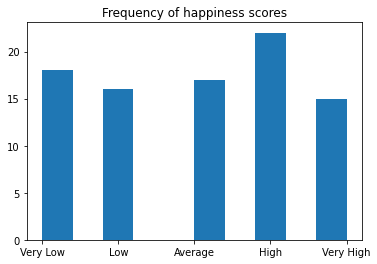

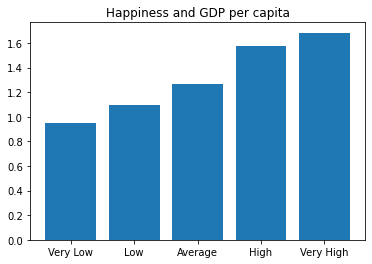

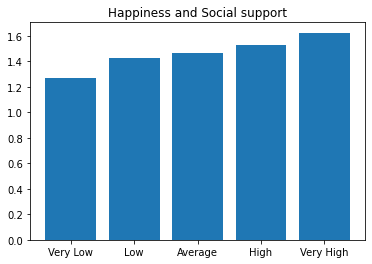

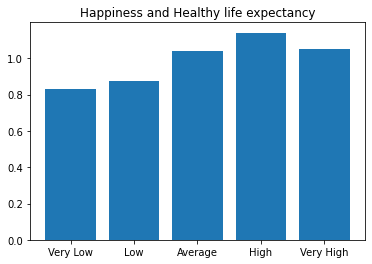

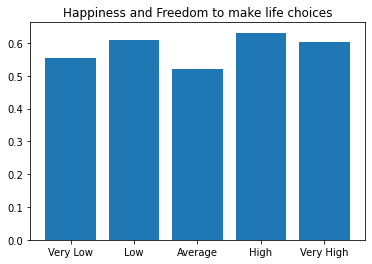

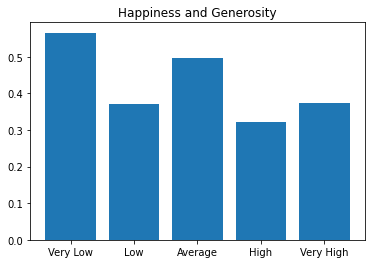

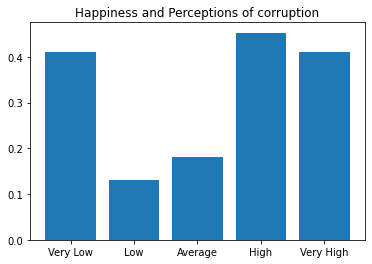

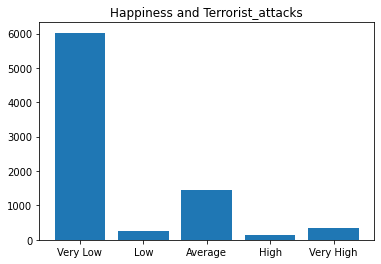

In [6]:
plt.hist(df_sorted['Happiness'])
plt.title('Frequency of happiness scores')
plt.show()

columns = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Terrorist_attacks']
for column in columns:
  plt.bar('Happiness', column, data=df_sorted)
  plt.title("Happiness and "+str(column))
  plt.show()

These bar plots show the relationship between happiness level and GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, perceptions of corruption, and terrorist attacks.

There appear to be positive relationships between happiness and both GDP per capita and social support. There is a weakly positive relationship between happiness and life expectancy.

There is heterogeneity in the impact of freedom to make life choices, generosity, and perceptions of corruption. 

It seems that terrorist attacks are associated with low levels of happiness.

# Data preprocessing

In [ ]:
!pip install aimodelshare --upgrade

In [14]:
X_train.columns

Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'name', 'region', 'sub-region',
       'Terrorist_attacks', 'country_name_x', 'population_x',
       'population_below_poverty_line_x', 'hdi_x', 'life_expectancy_x',
       'expected_years_of_schooling_x', 'mean_years_of_schooling_x', 'gni_x',
       'country_name_y', 'population_y', 'population_below_poverty_line_y',
       'hdi_y', 'life_expectancy_y', 'expected_years_of_schooling_y',
       'mean_years_of_schooling_y', 'gni_y', 'country_name', 'population',
       'population_below_poverty_line', 'hdi', 'life_expectancy',
       'expected_years_of_schooling', 'mean_years_of_schooling', 'gni'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#preprocessing pipelines for both numeric and categorical data.

#preprocessing pipeline for numeric data
##replace missing with median; scale and center
numeric_features = X_train.drop(['country_name_x', 'country_name_y', 'country_name','Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#preprocessing pipeline for categorical data
##replace missing with modal; OHE
categorical_features = ['region', 'sub-region']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [18]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [19]:
num_columns = numeric_features
cat_columns = preprocess.named_transformers_['cat'].named_steps['onehot'].get_feature_names().tolist()
prepro_names = num_columns + cat_columns
prepro_columns = np.array(prepro_names)
print(prepro_columns)

['GDP per capita' 'Social support' 'Healthy life expectancy'
 'Freedom to make life choices' 'Generosity' 'Perceptions of corruption'
 'Terrorist_attacks' 'population_x' 'population_below_poverty_line_x'
 'hdi_x' 'life_expectancy_x' 'expected_years_of_schooling_x'
 'mean_years_of_schooling_x' 'gni_x' 'population_y'
 'population_below_poverty_line_y' 'hdi_y' 'life_expectancy_y'
 'expected_years_of_schooling_y' 'mean_years_of_schooling_y' 'gni_y'
 'population' 'population_below_poverty_line' 'hdi' 'life_expectancy'
 'expected_years_of_schooling' 'mean_years_of_schooling' 'gni' 'x0_Africa'
 'x0_Americas' 'x0_Asia' 'x0_Europe' 'x0_Oceania'
 'x1_Australia and New Zealand' 'x1_Central Asia' 'x1_Eastern Asia'
 'x1_Eastern Europe' 'x1_Latin America and the Caribbean'
 'x1_Northern Africa' 'x1_Northern America' 'x1_Northern Europe'
 'x1_South-eastern Asia' 'x1_Southern Asia' 'x1_Southern Europe'
 'x1_Sub-Saharan Africa' 'x1_Western Asia' 'x1_Western Europe']


# EDA: Feature importance models

Log Reg (l1 penalty) numeric feature coefs


,Category,Very Low,Low,Average,High,Very High
0,GDP per capita,0.710132,0.000000,0.000000,0.131158,-1.304319
1,Social support,0.000000,1.546717,0.000000,0.000000,-0.477161
2,Healthy life expectancy,0.000000,0.638704,-0.403196,0.000000,0.000000
3,Freedom to make life choices,-0.268847,0.568497,0.000000,0.321784,-0.171131
4,Generosity,-0.154641,-0.673608,-0.211436,0.869312,0.306742
5,Perceptions of corruption,0.000000,-0.836706,-0.527704,0.271547,0.255308
6,Terrorist_attacks,0.000000,0.000000,-1.060952,0.000000,0.990733
7,population_x,0.220494,-0.178622,-0.087268,0.000000,0.000000
8,population_below_poverty_line_x,0.000000,0.177990,-0.162859,-0.132220,0.000092
9,hdi_x,0.000000,0.000000,0.000000,0.000000,0.000000


<ipython-input-20-a324e1e9633f>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(prepro_columns)


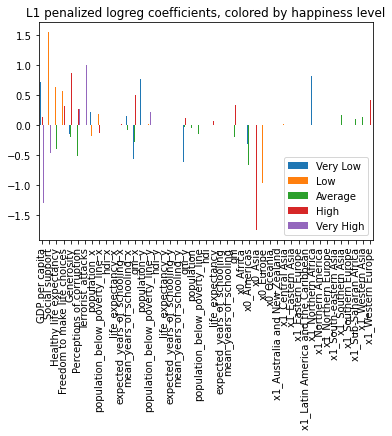



Decision Tree feature importances


,Category,0
0,GDP per capita,0.252689
1,Social support,0.137296
2,Healthy life expectancy,0.177659
3,Freedom to make life choices,0.050312
4,Generosity,0.000000
5,Perceptions of corruption,0.050654
6,Terrorist_attacks,0.038851
7,population_x,0.000000
8,population_below_poverty_line_x,0.000000
9,hdi_x,0.000000


<ipython-input-20-a324e1e9633f>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(prepro_columns)


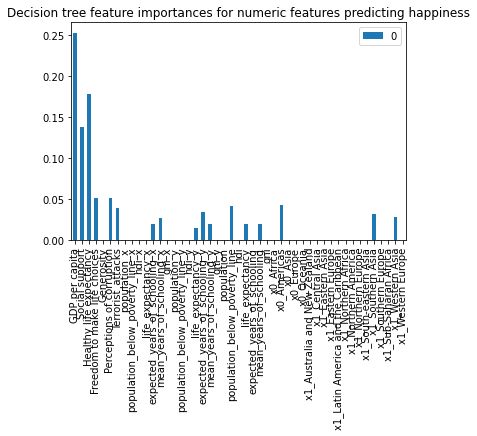

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(preprocessor(X_train), y_train_labels)
print("Log Reg (l1 penalty) numeric feature coefs")
names = (pd.Series(prepro_columns, name='Category'))
coefs = (pd.DataFrame(logreg.coef_).T)
lrc = pd.concat((names, coefs), axis=1)
lrc = lrc.rename({0:'Very Low', 1:'Low', 2:'Average', 3:'High', 4: 'Very High'}, axis=1)
display(lrc)

lrc.plot(kind='bar')
plt.title('L1 penalized logreg coefficients, colored by happiness level')
plt.axes().set_xticklabels(prepro_columns)
plt.show()

print('\n')

tree = DecisionTreeClassifier()
tree.fit(preprocessor(X_train), y_train)
print("Decision Tree feature importances")
coefs = pd.DataFrame(tree.feature_importances_)
names = (pd.Series(prepro_columns, name='Category'))
trc = pd.concat((names, coefs), axis=1)
display(trc)

trc.plot(kind='bar')
plt.title('Decision tree feature importances for numeric features predicting happiness')
plt.axes().set_xticklabels(prepro_columns)
plt.show()

Here, models were run that perform intrinsic feature selection. 

In the l1 penalized logreg, the coefficient sizes are compared. This model was chosen because coefficients are deflated and it performs intrinsic feature selection.

Decision trees also perform intrinsic feature selection. Here, the feature importance (not coefficient size) is compared directly.

The models show similar findings. GDP per capita and social support are important factors in predicting happiness, and Generosity is not an important factor. 

Finally, by way of EDA, KMeans Clustering was run (below) to find potential clusters.

# Prediction models

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#train test split training data to create labeled test set for hyperparameter tuning

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train_labels, test_size=0.2, stratify=y_train_labels, random_state=0)
print(X_train_train.shape)
print(X_train_test.shape)
print(y_train_train.shape)
print(y_train_test.shape)


(70, 35)
(18, 35)
(70,)
(18,)


##### Gradient Boosting Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

#Example code to fit model:
gbc = GradientBoostingClassifier(random_state=0, max_depth=10)
param_grid = {'n_estimators':np.arange(1, 500, 100), 'learning_rate':(0.01, 0.1, 1)}
grid = GridSearchCV(gbc, param_grid=param_grid, cv=10).fit(preprocessor(X_train_train), y_train_train)
print(grid.score(preprocessor(X_train_test), y_train_test))
grid.best_params_

0.5


{'learning_rate': 1, 'n_estimators': 201}

In [29]:
model1 = GradientBoostingClassifier(random_state=0, max_depth=10, learning_rate=1, n_estimators=201).fit(preprocessor(X_train_train), y_train_train)
print(model1.score(preprocessor(X_train_train), y_train_train)) # Fit score, 0-1 scale.
print(model1.score(preprocessor(X_train_test), y_train_test))

1.0
0.5


##### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_grid = {'n_estimators':np.arange(1,1100, 100), 'max_depth':np.arange(1,50, 5)}
grid2 = GridSearchCV(rfc, param_grid=param_grid,cv=10).fit(preprocessor(X_train_train), y_train_train)
print(grid2.score(preprocessor(X_train_test), y_train_test))
grid2.best_params_

0.4444444444444444


{'max_depth': 6, 'n_estimators': 1001}

In [30]:
model2 = RandomForestClassifier(n_estimators=1001, max_depth=6).fit(preprocessor(X_train_train), y_train_train)
print(model2.score(preprocessor(X_train_train), y_train_train)) # Fit score, 0-1 scale.
print(model2.score(preprocessor(X_train_test), y_train_test))

1.0
0.5


##### KNN Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,21,2)}
grid3 = GridSearchCV(knn, param_grid=param_grid, cv=10).fit(preprocessor(X_train_train), y_train_train)
print(grid3.score(preprocessor(X_train_test), y_train_test))
grid3.best_params_

0.5555555555555556


{'n_neighbors': 11}

In [32]:
model3 = KNeighborsClassifier(n_neighbors=11).fit(preprocessor(X_train_train), y_train_train)
print(model3.score(preprocessor(X_train_train), y_train_train)) # Fit score, 0-1 scale.
print(model3.score(preprocessor(X_train_test), y_train_test))

0.6714285714285714
0.5555555555555556


##### SVC

In [33]:
from sklearn.svm import SVC

svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
grid4 = GridSearchCV(svc, param_grid=param_grid, cv=10).fit(preprocessor(X_train_train), y_train_train)
print(grid4.score(preprocessor(X_train_test), y_train_test))
grid4.best_params_

0.6666666666666666


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [34]:
model4 = SVC(C=100, gamma=0.001, kernel='rbf').fit(preprocessor(X_train_train), y_train_train)
print(model4.score(preprocessor(X_train_train), y_train_train)) # Fit score, 0-1 scale.
print(model4.score(preprocessor(X_train_test), y_train_test))

0.8571428571428571
0.6666666666666666


##### Bagging Classifier

In [35]:
from sklearn.ensemble import BaggingClassifier

model5 = BaggingClassifier().fit(preprocessor(X_train_train), y_train_train)
print(model5.score(preprocessor(X_train_train), y_train_train)) # Fit score, 0-1 scale.
print(model5.score(preprocessor(X_train_test), y_train_test))

0.9571428571428572
0.5


## Fit and save out model (done for each of the models listed above)

In [ ]:
model = model5

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## Generate predictions and submit model (done for each of the 6 models listed above)

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
#-- Generate predicted values 
prediction_labels = model.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                  custom_metadata = {'team':'7'})


Insert search tags to help users find your model (optional): bagging classifier
Provide any useful notes about your model (optional): bagging classifier with decision tree

Your model has been submitted as model version 501

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


# Outcomes

First, I submitted a Gradient Boosting Classifier, Random Forest Classifier, and KNN Classifier. These models didn't perform particularly well and appeared to be overfit to the training data. The random forest had accuracy 0.441176 and f1 below 0.4 for both models. My team's advice was to test different architectures, including suggested a Bagging Classifier and SVC. They also suggested changing the hyper-parameters. 

After hyper-parameter tuning, I submitted a Bagging Classifier, SVC, and a few other Gradient Boosting Classifiers with different hyper parameters. The final models are shown below.

Only two models had accuracy above 0.5. Neither had f1 scores above 0.5. The two best models were gradient boosted classifier and SVM. 

Overall, the best performing model was a gradient boosted classifier with hyper parameters: {'learning_rate': 1, 'n_estimators': 101}. The accuracy was 0.529412 for this model and f1 score was 0.496121. All of the models and their comparative metrics are shown below.

In [ ]:
results = pd.read_csv('public-leaderboard.csv')
print(results.columns)
results.head(n=15)

Index(['ACCURACY', 'F1_SCORE', 'PRECISION', 'RECALL', 'ML_FRAMEWORK',
       'TRANSFER_LEARNING', 'DEEP_LEARNING', 'MODEL_TYPE', 'DEPTH',
       'NUM_PARAMS', 'FLATTEN_LAYERS', 'BATCHNORMALIZATION_LAYERS',
       'DROPOUT_LAYERS', 'DENSE_LAYERS', 'SIGMOID_ACT', 'RELU_ACT', 'TANH_ACT',
       'SOFTMAX_ACT', 'LOSS', 'OPTIMIZER', 'MEMORY_SIZE', 'TEAM', 'USERNAME',
       'TIMESTAMP', 'VERSION'],
      dtype='object')


,ACCURACY,F1_SCORE,PRECISION,RECALL,ML_FRAMEWORK,TRANSFER_LEARNING,DEEP_LEARNING,MODEL_TYPE,DEPTH,NUM_PARAMS,...,RELU_ACT,TANH_ACT,SOFTMAX_ACT,LOSS,OPTIMIZER,MEMORY_SIZE,TEAM,USERNAME,TIMESTAMP,VERSION
0,0.529412,0.496121,0.677778,0.537857,sklearn,False,False,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-02-03 21:06:32.633284,246
1,0.500000,0.495707,0.575983,0.524286,sklearn,False,False,SVC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-02-06 19:07:27.821977,499
2,0.470588,0.469382,0.632821,0.484286,sklearn,False,False,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-02-02 22:21:28.005441,143
3,0.470588,0.469382,0.632821,0.484286,sklearn,False,False,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-01-31 22:43:05.553645,19
4,0.470588,0.440635,0.643939,0.495714,sklearn,False,False,RandomForestClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-01-31 22:42:08.360418,13
5,0.470588,0.446762,0.562821,0.484286,sklearn,False,False,RandomForestClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-02-06 19:03:43.939191,498
6,0.441176,0.437124,0.628333,0.444286,sklearn,False,False,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-02-03 19:31:15.663887,230
7,0.441176,0.444567,0.505556,0.440714,sklearn,False,False,BaggingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-02-06 19:11:32.853546,501
8,0.441176,0.421506,0.516190,0.455714,sklearn,False,False,RandomForestClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lprockop,2023-01-31 22:41:02.920352,9
9,0.441176,0.361005,0.508824,0.478571,sklearn,False,False,RandomForestClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-01-31 22:40:09.620017,6


In [ ]:
print("Best accuracy and f1 score for each model type:")
display(results[['ACCURACY', 'F1_SCORE']].groupby(results['MODEL_TYPE']).max())

Best accuracy and f1 score for each model type:


,ACCURACY,F1_SCORE
MODEL_TYPE,,
BaggingClassifier,0.441176,0.444567
GradientBoostingClassifier,0.529412,0.496121
RandomForestClassifier,0.470588,0.446762
SVC,0.500000,0.495707


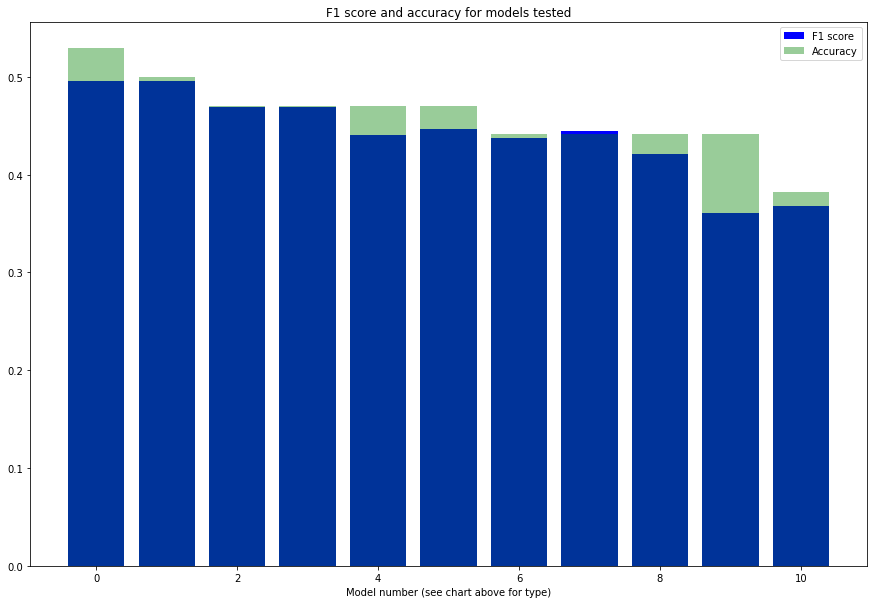

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(results.index, results['F1_SCORE'], alpha=1, color='blue', label='F1 score')
plt.bar(results.index, results['ACCURACY'], alpha=0.4, color='green', label='Accuracy')
plt.xlabel('Model number (see table above for type)')
plt.title('F1 score and accuracy for models tested')
plt.legend()
plt.show()

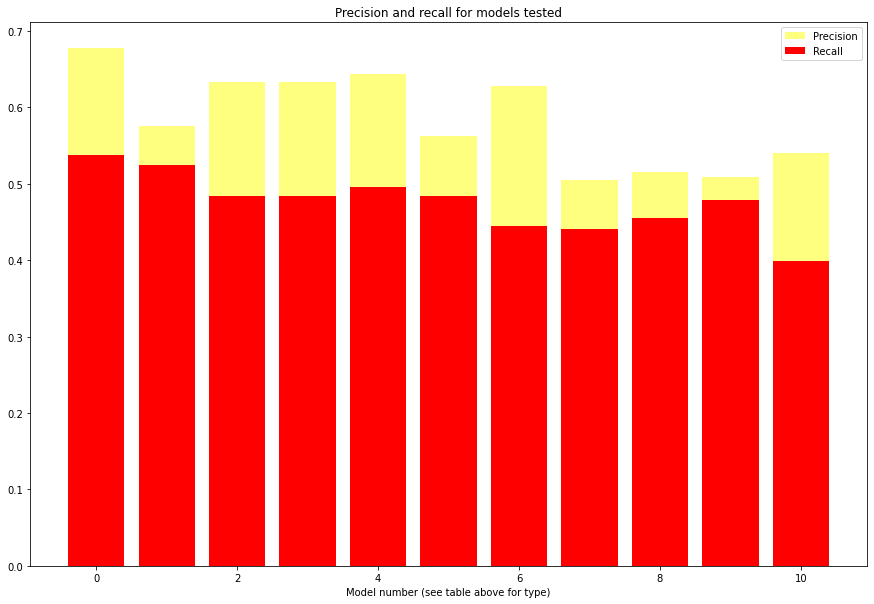

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(results.index, results['PRECISION'], alpha=0.5, color='yellow', label='Precision')
plt.bar(results.index, results['RECALL'], alpha=1, color='red', label='Recall')
plt.xlabel('Model number (see table above for type)')
plt.title('Precision and recall for models tested')
plt.legend()
plt.show()